In [1]:
import tensorflow as tf
import numpy as np
import cv2 as cv
import os

from google.colab.patches import cv2_imshow

from zipfile import ZipFile

In [2]:
ZipFile('Data.zip', 'r').extractall()

In [31]:
train_set = tf.keras.utils.image_dataset_from_directory(
    'Data',
    validation_split=0.35,
    subset="training",
    seed=7,
    image_size=(256, 256),
    batch_size=16,
    labels='inferred',
    color_mode='grayscale'
)

val_set = tf.keras.utils.image_dataset_from_directory(
    'Data',
    validation_split=0.35,
    subset="validation",
    seed=7,
    image_size=(256, 256),
    batch_size=16,
    labels='inferred',
    color_mode='grayscale'
)

classes_names = train_set.class_names

Found 1419 files belonging to 3 classes.
Using 923 files for training.
Found 1419 files belonging to 3 classes.
Using 496 files for validation.


In [33]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(scale=1./255),
  tf.keras.layers.Conv2D(32, (3,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, (3,3)),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(input_shape=(256, 256, 1)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')                        
])

model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

model.fit(train_set, epochs=3)

Epoch 1/3
58/58 [==============================] - 2s 25ms/step - loss: 0.1890 - accuracy: 0.9220
Epoch 2/3
58/58 [==============================] - 2s 25ms/step - loss: 0.0060 - accuracy: 0.9967
Epoch 3/3
58/58 [==============================] - 1s 24ms/step - loss: 4.5766e-05 - accuracy: 1.0000


In [34]:
results = model.evaluate(val_set, batch_size=16)

31/31 [==============================] - 1s 14ms/step - loss: 6.0573e-05 - accuracy: 1.0000


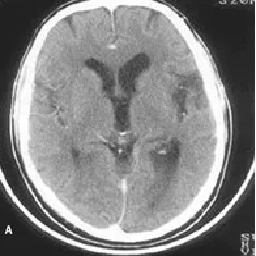

Class: Isquemico (0.993782)


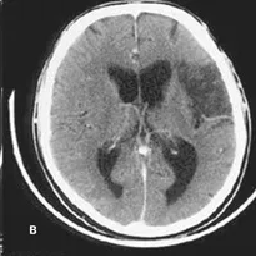

Class: Isquemico (0.688943)


In [35]:
for name in ['teste1', 'teste2']:
  img = tf.keras.preprocessing.image.load_img(f'Teste/{name}.png', target_size=(256, 256), color_mode = "grayscale")
  display(img)

  x = tf.keras.preprocessing.image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  y_hat = model.predict(x)

  print(f'Class: %s (%f)' % (classes_names[int(np.argmax(y_hat))], np.max(y_hat)))

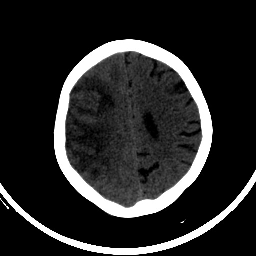

In [46]:
name = 'image100.jpg'

img = tf.keras.preprocessing.image.load_img(f'Data/Isquemico/{name}', target_size=(256, 256), color_mode = "grayscale")
display(img)